In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df= pd.read_csv('marketing_customer_analysis.csv')

In [5]:
# defining function for cleaning and wrangling dataframe
def clean_wrangle_dataframe(csv_file):
    import pandas as pd
    df_original = pd.read_csv(csv_file) # setting the inserted dataframe as an variable
    # standardizing header names by lowering them
    columnsdf_original = []
    for i in range(len(df_original.columns)):  # for loop goes along list of columns and creates new list in lower case
        columnsdf_original.append(df_original.columns[i].lower())
    df_original.columns = columnsdf_original  # old list is replaced by cleaned one
    # further standardization of header names
    if columnsdf_original[8] == 'unnamed: 0':
        df_original.rename(columns={'employmentstatus': 'employment status'}, inplace=True, errors='raise')
    if columnsdf_original[0] == 'unnamed: 0':
        df_original = df_original.drop(['unnamed: 0'], axis = 1)
    # changing data type of dates
    df_original['effective to date'] = pd.to_datetime(df_original['effective to date'],errors = "coerce")
    df_original['effective to date'] = df_original['effective to date'][1].strftime(format='%d-%b-%Y')
    # creating new column for months
    df_original['effective to month'] = pd.DatetimeIndex(df_original['effective to date']).month
    # filtering out data outside of first quarter
    df_original.query('`effective to month` <= 3')
    df_cleaned = df_original.query('`effective to month` <= 3')
    return df_cleaned

In [6]:
new_df=clean_wrangle_dataframe('marketing_customer_analysis.csv')

In [7]:
#Show DataFrame info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

In [8]:
# describe 
new_df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,effective to month
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.0
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.0
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.0
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.0
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.0
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.0
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,1.0
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.0


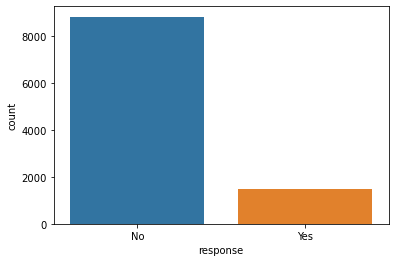

In [9]:
sns.countplot(x="response", data=new_df);

 Show a plot of the rate of the response types by each Sales Channel.
 
 - either % by channel and response 
 - or the number 
 - bar plot, stacked bar plot 
 - matrix - size with count and colour 
 - maybe some labels %

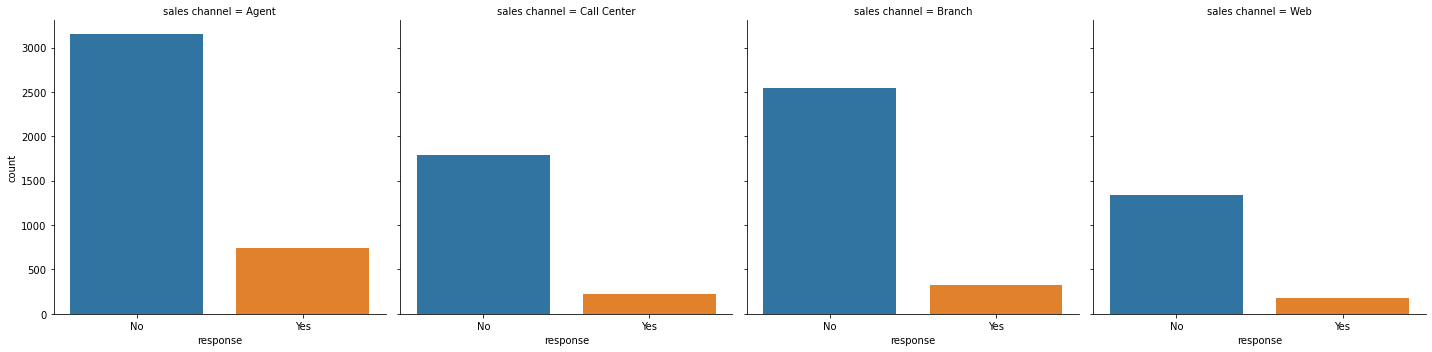

In [10]:
sns.catplot(x='response', col='sales channel', data=new_df, kind='count');

Show a plot of the distribution of the Total Claim Amount, broken down by response type. 
Try a boxplot and distribution plot, for each response type. 
For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

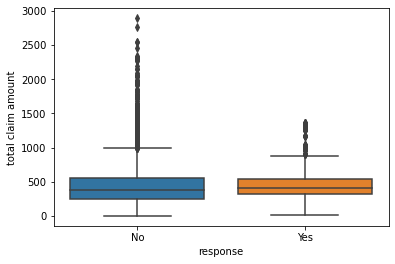

In [11]:
sns.boxplot(x="response", y="total claim amount", data=new_df);

In [12]:
#Show DataFrame info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

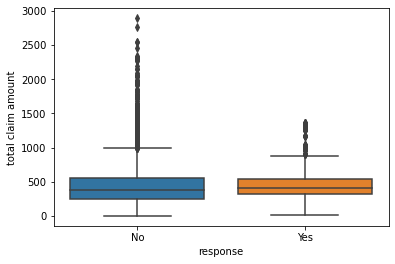

In [14]:
sns.boxplot(x="response", y="total claim amount", data= new_df);

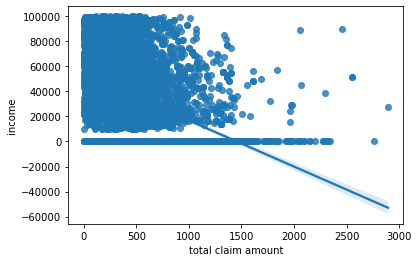

In [16]:
sns.regplot(x="total claim amount", y="income", data= new_df);

In [ ]:
#add a marker colour to look for patterns(?)

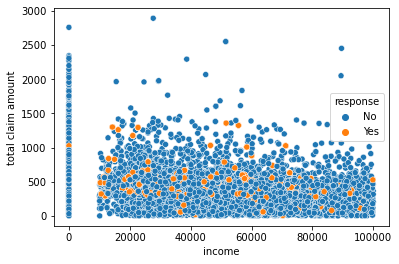

In [19]:
sns.scatterplot(x='income', y='total claim amount', hue='response', data = new_df);